
# Decision tree example 2


We will use the scikit-learn library to build the model and use Pima Indian Diabetes dataset. 

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. [link](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

## Libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report,confusion_matrix
%matplotlib inline

## Data

Simple data checks

In [15]:
# Loading data 
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vS3AZcRPdHN0unVUKIeJxjF7gBrp7BONnlIXiF1QIAjctY2hA6wibpHVvWNZPu2nujYT11vTozIp96i/pub?output=csv", header=None, names=col_names)

In [16]:
# Checking data 
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
pima.shape

(768, 9)

In [18]:
pima.columns

Index(['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree',
       'age', 'label'],
      dtype='object')

In [19]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   bp        768 non-null    int64  
 3   skin      768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   bmi       768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   label     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## EDA

In [20]:
pima.corr()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
label,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


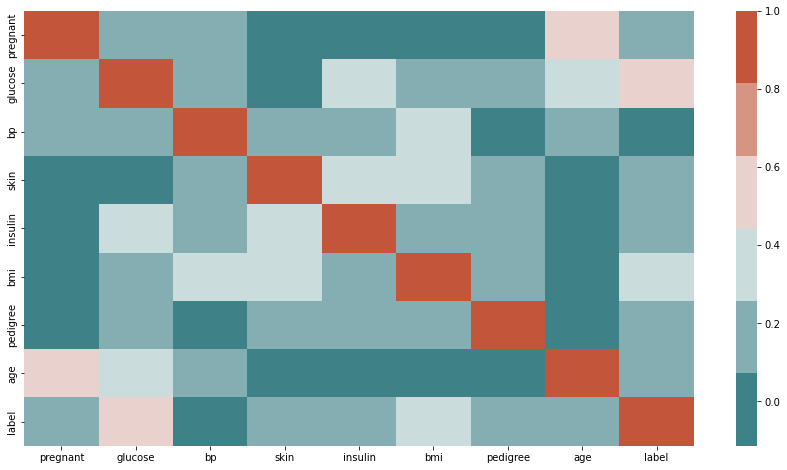

In [49]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize = (15, 8))

corrMatrix = pima.corr()
sn.heatmap(corrMatrix, annot=False, cmap=sns.diverging_palette(200, 20))
plt.show()

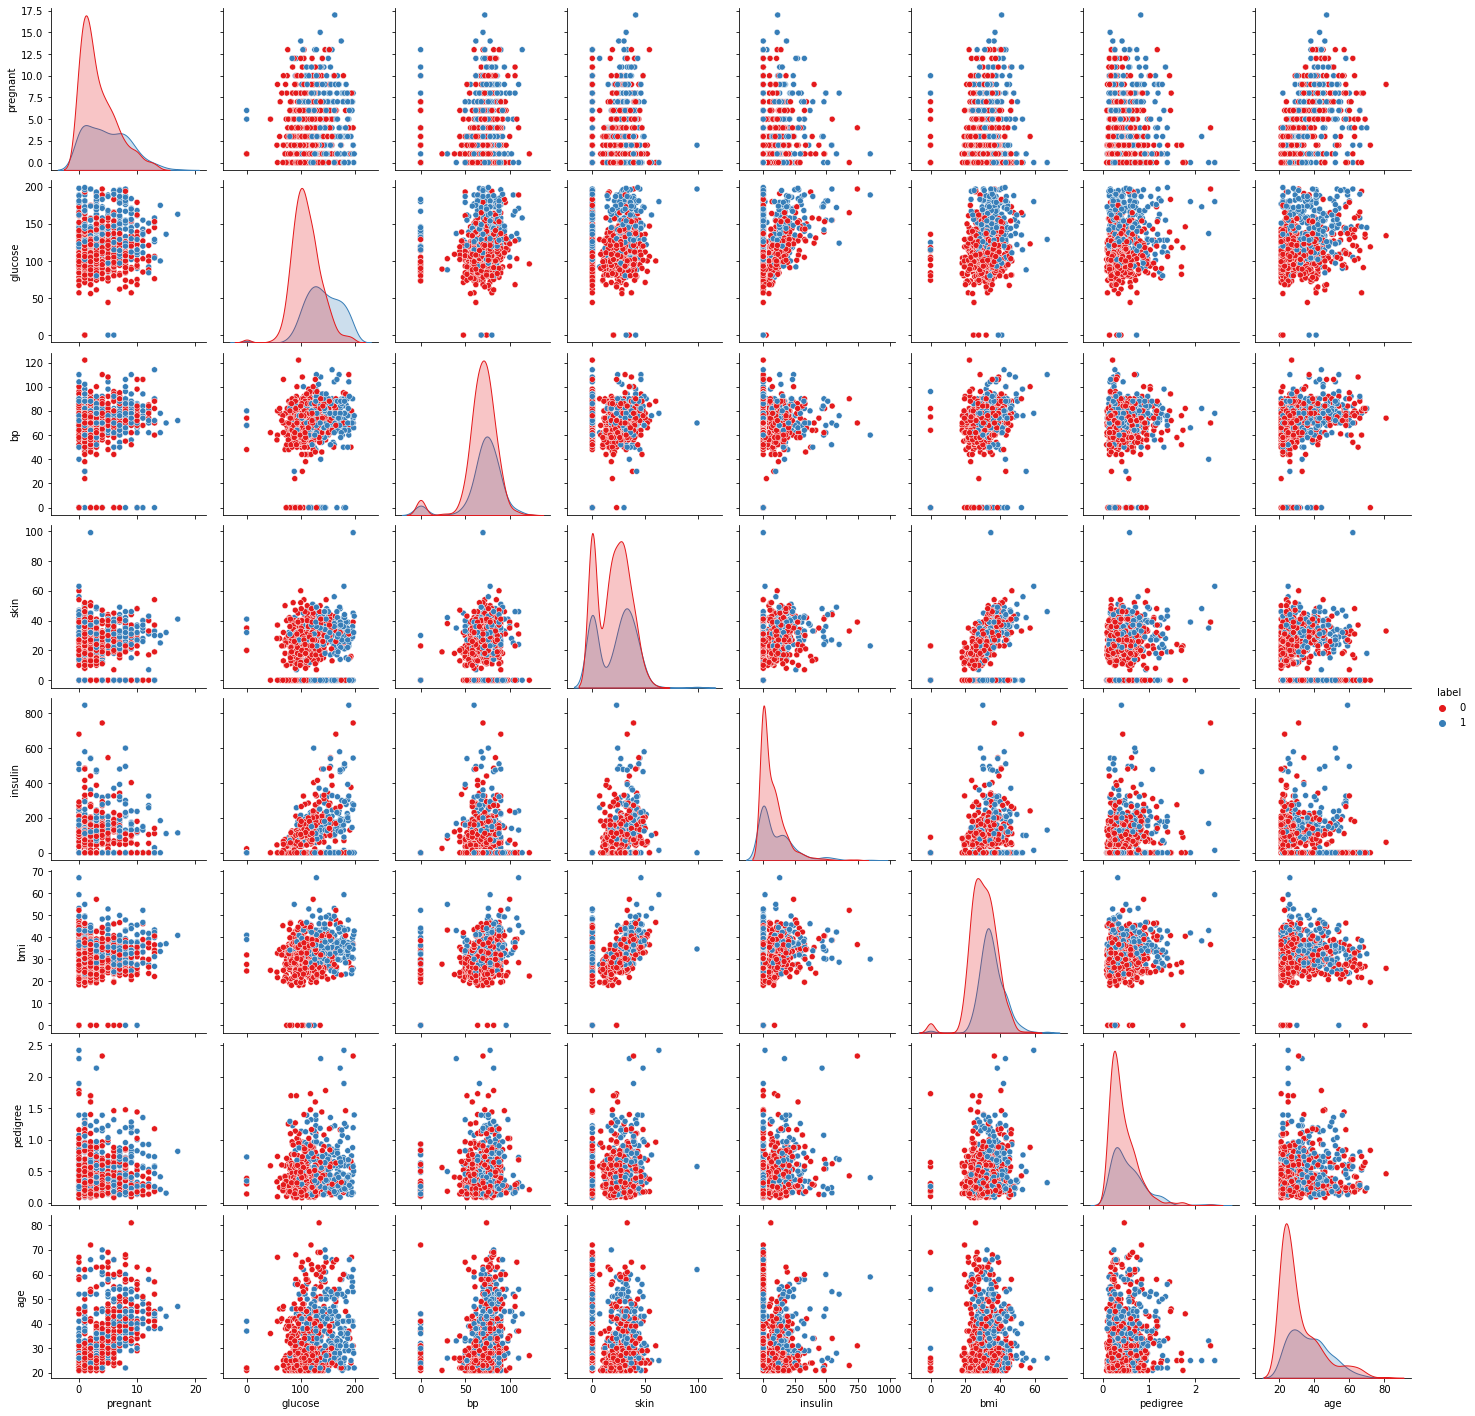

In [30]:
sn.pairplot(pima,hue='label', palette='Set1')

## Train Test Split

To understand model performance, dividing the dataset into a training set and a test set is a good strategy. Let's split the dataset by using the function train_test_split(). You need to pass 3 parameters: features, target, and test_set size.

In [59]:
X = pima.drop('label', axis = 1)
y = pima['label']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

## Building Decision Tree
Let's create a Decision Tree Model using Scikit-learn.

In [72]:
dtree = DecisionTreeClassifier(max_depth = 4, criterion="entropy")

In [73]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

## Evaluating Model
Let's estimate, how accurately the classifier or model can predict the type of cultivars. Accuracy can be computed by comparing actual test set values and predicted values.

In [74]:
predictions = dtree.predict(X_test)

In [75]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.66      0.98      0.79        92
           1       0.88      0.24      0.38        62

    accuracy                           0.68       154
   macro avg       0.77      0.61      0.58       154
weighted avg       0.75      0.68      0.62       154



In [76]:
print(confusion_matrix(y_test,predictions))

[[90  2]
 [47 15]]


## Visualisation 

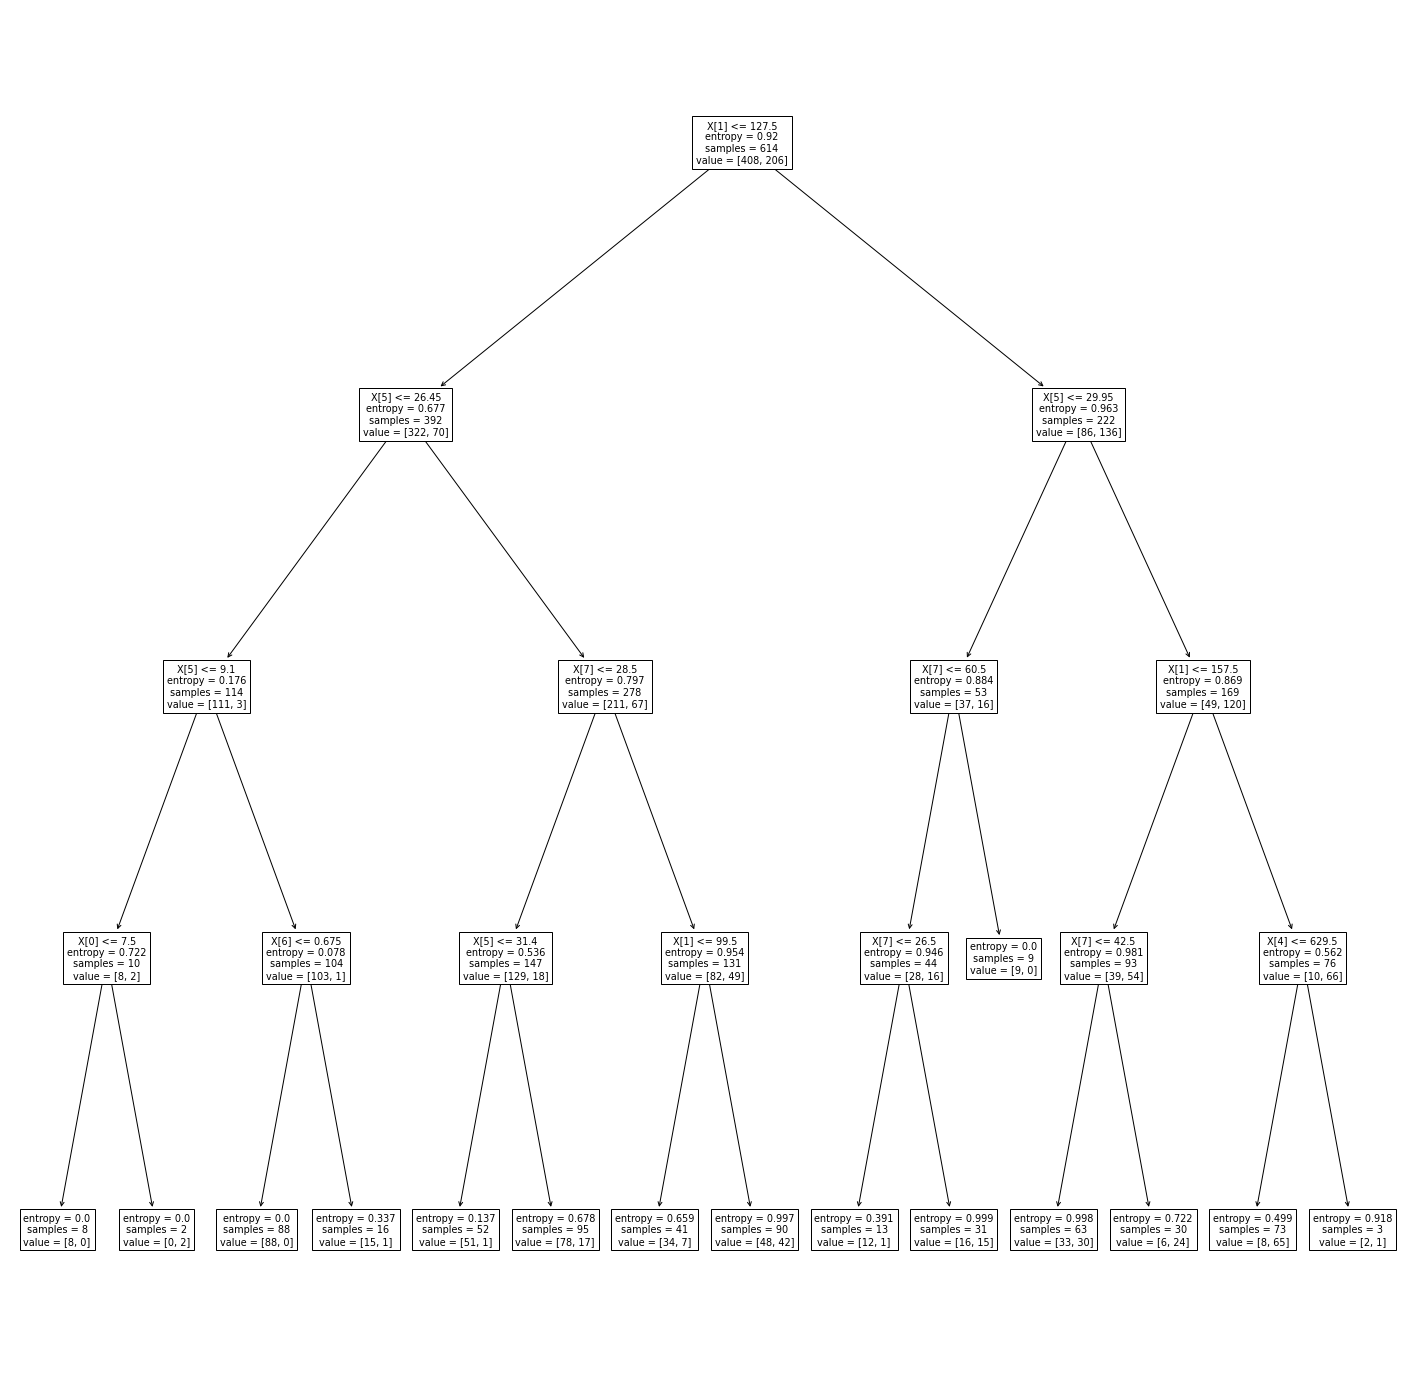

In [79]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize = (25, 25))

tree.plot_tree(dtree) 
plt.show()